In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind, shapiro, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

## Первичный анализ

In [175]:
df = pd.read_csv('flights_NY.csv')
df.sample(20)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
173243,2013,4,9,1602.0,9.0,1712.0,-12.0,B6,N265JB,12,JFK,SYR,45.0,209
136968,2013,3,1,1803.0,3.0,2119.0,10.0,B6,N590JB,989,JFK,FLL,172.0,1069
53174,2013,10,29,753.0,-7.0,843.0,-24.0,US,N952UW,2138,LGA,BOS,34.0,184
58029,2013,11,3,1447.0,0.0,1745.0,-9.0,UA,N24715,1744,LGA,IAH,206.0,1416
283583,2013,8,4,2201.0,21.0,2322.0,22.0,MQ,N800MQ,3621,JFK,DCA,44.0,213
114659,2013,2,5,554.0,-6.0,836.0,-1.0,DL,N3773D,461,LGA,ATL,120.0,762
159868,2013,3,26,1129.0,-11.0,1443.0,-2.0,AA,N3FFAA,1623,EWR,MIA,165.0,1085
101932,2013,12,21,819.0,4.0,1035.0,-1.0,9E,N902XJ,2921,JFK,MSP,174.0,1029
205857,2013,5,14,1208.0,-2.0,1503.0,-26.0,UA,N508UA,257,JFK,SFO,332.0,2586
26607,2013,1,31,1620.0,76.0,1808.0,88.0,EV,N11193,4125,EWR,RDU,72.0,416


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 36.0+ MB


In [179]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 37.5+ MB


In [181]:
df.sample(20)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
218176,2013,5,27,2003.0,-2.0,2141.0,-19.0,MQ,N713MQ,4555,LGA,CMH,77.0,479
168867,2013,4,4,1935.0,5.0,2059.0,11.0,EV,N826AS,5714,JFK,IAD,45.0,228
241798,2013,6,21,1825.0,130.0,1942.0,97.0,9E,N913XJ,3400,JFK,MKE,101.0,745
182037,2013,4,18,1935.0,63.0,2221.0,26.0,UA,N409UA,722,EWR,LAX,306.0,2454
113374,2013,2,3,1600.0,0.0,1827.0,-7.0,FL,N979AT,620,LGA,ATL,111.0,762
20231,2013,1,24,900.0,-4.0,1100.0,7.0,UA,N78285,1602,EWR,CLE,79.0,404
194843,2013,5,2,1344.0,34.0,1448.0,25.0,EV,N14125,4681,EWR,IAD,38.0,212
309613,2013,9,1,1520.0,-5.0,1808.0,-32.0,AA,N338AA,133,JFK,LAX,319.0,2475
268219,2013,7,19,1912.0,7.0,2111.0,3.0,9E,N906XJ,3525,JFK,ORD,111.0,740
205495,2013,5,14,602.0,-8.0,735.0,-10.0,AA,N479AA,301,LGA,ORD,120.0,733


## ЗАДАНИЕ 1


Выберите 10 аэропортов, в которые чаще всего летают из Нью-Йорка. Для каждого  из них оцените вероятность, что рейс прилетит с положительной задержкой (arr_delay > 0) и постройте график (столбчатая диаграмма), на котором по оси х – название аэропорта, по оси y – вероятность задержки прилета. Названия аэропортов по оси х расположите слева направо по убыванию количества рейсов в этот аэропорт. Для какого аэропорта из этих 10 вероятность окажется наибольшей, и для какого – наименьшей? 



In [185]:
t10_dests = df['dest'].value_counts().head(10)
t10_dests

dest
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
CLT    13674
SFO    13173
FLL    11897
MIA    11593
DCA     9111
Name: count, dtype: int64

In [187]:
t10_list = t10_dests.index.tolist()
t10_list

['ATL', 'ORD', 'LAX', 'BOS', 'MCO', 'CLT', 'SFO', 'FLL', 'MIA', 'DCA']

In [189]:
df_t10 = df[df['dest'].isin(t10_list)]
delay_probs = df_t10.groupby('dest')['arr_delay'].apply(lambda x: (x>0).mean())
delay_probs

dest
ATL    0.471937
BOS    0.315737
CLT    0.426942
DCA    0.439359
FLL    0.438094
LAX    0.372332
MCO    0.397007
MIA    0.332528
ORD    0.374140
SFO    0.375085
Name: arr_delay, dtype: float64

In [191]:
dest_order = t10_dests.loc[delay_probs.index].sort_values(ascending=False).index
dest_order

Index(['ATL', 'ORD', 'LAX', 'BOS', 'MCO', 'CLT', 'SFO', 'FLL', 'MIA', 'DCA'], dtype='object', name='dest')

Text(0.5, 1.0, 'Вероятность задержки рейса в топ-10 направлениях из NY аэропортов')

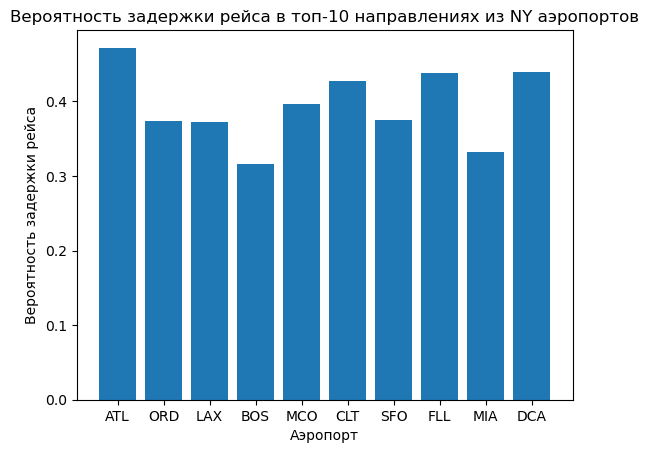

In [193]:
plt.bar(dest_order, delay_probs[dest_order])
plt.xlabel('Аэропорт')
plt.ylabel('Вероятность задержки рейса')
plt.title('Вероятность задержки рейса в топ-10 направлениях из NY аэропортов')

Максимальная вероятность задержки - ATL, Минимальная - BOS

## ЗАДАНИЕ 2

Постройте нормированную гистограмму распределения времени перелета из Нью-Йорка в Сан-Франциско (SFO). Предполагая, что это распределение описывается нормальным законом, оцените параметры нормального закона и наложите график плотности полученного нормального закона на график с гистограммой. В каких пределах с вероятностью не менее 95% лежит время полета?

In [198]:
df_sfo = df[df['dest']=='SFO']
air_times = df_sfo['air_time']

In [200]:
my = air_times.mean()
sig = air_times.std()

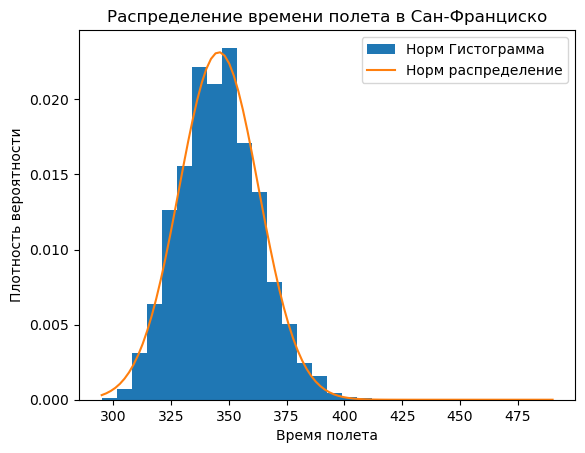

In [202]:
plt.hist(air_times, bins=30, density=True, label='Норм Гистограмма')
x = np.linspace(min(air_times), max(air_times), 100)
plt.plot(x, norm.pdf(x,my,sig), label='Норм распределение')
plt.xlabel('Время полета')
plt.ylabel('Плотность вероятности')
plt.title('Распределение времени полета в Сан-Франциско')
plt.legend()

In [204]:
ti_l = my - 1.96*sig
ti_u = my + 1.96*sig
print(f'95% доверительный нтервал: {ti_l:.0f} - {ti_u:.0f} минут')

95% доверительный нтервал: 312 - 379 минут


## ЗАДАНИЕ 3

Нарисуйте распределение по часам (0-23) количества вылетов из аэропорта JFK и найдите два пиковых часа (один до полудня, другой – после полудня) по количеству вылетов (время вылета переводите в час вылета округлением вниз, например 7:20 -> 7, 16:45 -> 16). Для каждого из двух найденных пиковых часов найдите среднее время задержки вылетов в этот час. Когда средняя задержка больше? Будет ли это различие в средних значениях статистически значимо?


In [218]:
df_jfk = df[df['origin']=='JFK'].copy()

In [224]:
df_jfk['dep_hour'] = (df['dep_time']//100).astype(int)

In [226]:
hour_counts = df_jfk['dep_hour'].value_counts().sort_index()

([<matplotlib.axis.XTick at 0x14f52b5f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

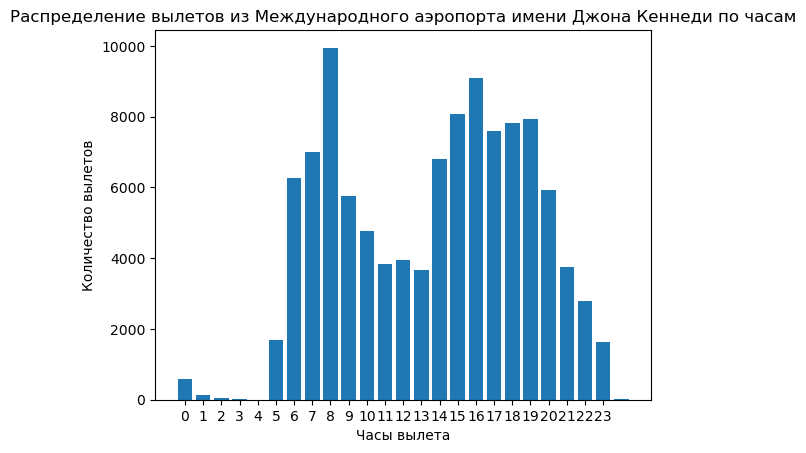

In [240]:
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Часы вылета')
plt.ylabel('Количество вылетов')
plt.title('Распределение вылетов из Международного аэропорта имени Джона Кеннеди по часам')
plt.xticks(range(0,24))

In [252]:
am_extr = hour_counts[hour_counts.index <= 11].idxmax()
print(f'Пик до полудня: {am_extr} часов утра')
pm_extr = hour_counts[hour_counts.index >= 12].idxmax()
print(f'Пик после полудня: {pm_extr} часов дня')

Пик до полудня: 8 часов утра
Пик после полудня: 16 часов дня


In [256]:
delay_am = df_jfk[df_jfk['dep_hour'] == am_extr]['dep_delay']
delay_pm = df_jfk[df_jfk['dep_hour'] == pm_extr]['dep_delay']

In [282]:
am_mean = delay_am.mean()
pm_mean = delay_pm.mean()
print(f'средняя задержка am:{am_mean}')
print(f'средняя задержка pm:{pm_mean}')

средняя задержка am:1.0374019706414639
средняя задержка pm:10.867650297291345


In [284]:
stat, p_value = mannwhitneyu(delay_am, delay_pm, alternative='two-sided')
print("U-статистика:", stat)
print("p-value:", p_value)

U-статистика: 32059833.5
p-value: 1.0875595351923354e-263


Различие статистически значимо

## ЗАДАНИЕ 4

Для каждого аэропорта прилета найдите величину стандартного отклонения времени перелета. Постройте график (точечная диаграмма) зависимости стандартного отклонения от расстояния до аэропорта. Аппроксимируйте полученную зависимость моделью линейной регрессии на основе расстояния до аэропорта  Добавьте к предыдущему графику график линейной регрессии. Уточните модель линейной регрессии, используя дополнительные входные признаки на основе расстояния до аэропорта. Добавьте график уточненной модели. Сравните точность моделей.


In [324]:
dest_at_std_distance_mn = df.groupby('dest').agg({
    'air_time': 'std',
    'distance': 'mean'
}).dropna().reset_index()

dest_at_std_distance_mn.columns = ['dest', 'air_time_std', 'distance']

In [344]:
X = dest_at_std_distance_mn[['distance']]
y = dest_at_std_distance_mn['air_time_std']

model_lin = LinearRegression()
model_lin.fit(X,y)
y_pred_lin = model_lin.predict(X)

r2_linear = r2_score(y, y_pred_lin)

In [346]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

r2_poly = r2_score(y, y_pred_poly)


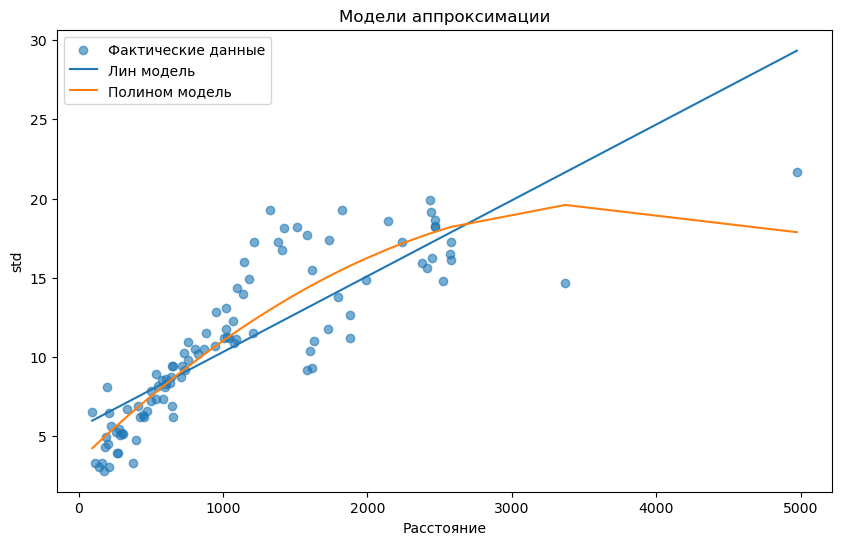

In [368]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Фактические данные", alpha=0.6)

X_sorted = X.sort_values("distance")
plt.plot(X_sorted, model_lin.predict(X_sorted), label="Лин модель")
plt.plot(X_sorted, model_poly.predict(poly.transform(X_sorted)), label="Полином модель")

plt.xlabel("Расстояние")
plt.ylabel("std")
plt.title("Модели аппроксимации")
plt.legend()


In [370]:
print(f"Линейная модель R²: {r2_linear:.3f}")
print(f"Полиномиальная модель R²: {r2_poly:.3f}")

Линейная модель R²: 0.709
Полиномиальная модель R²: 0.798


## ЗАДАНИЕ 5

Методом кластерного анализа выделите три группы авиакомпаний на основе пары признаков: средняя задержка прилета и средняя задержка вылета. Постройте точечную диаграмму на этих признаках и раскрасьте точки в соответствии с номером кластера. Попробуйте дать интерпретацию кластерам (в этом может помочь название авиакомпании).


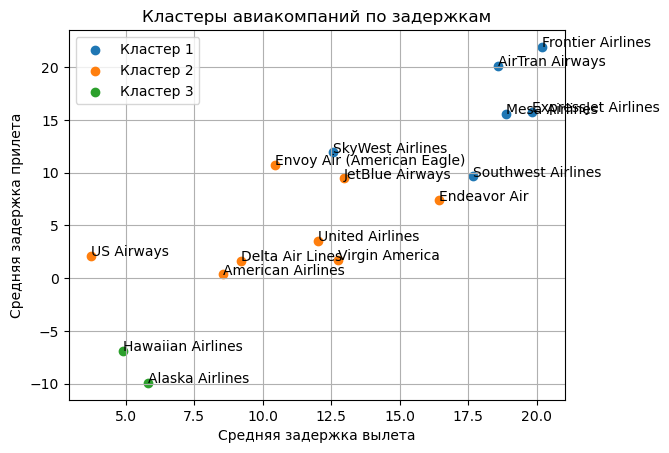

In [466]:
carrier = sorted(df['carrier'].unique())
names = [
    "Endeavor Air",
    "American Airlines",
    "Alaska Airlines",
    "JetBlue Airways",
    "Delta Air Lines",
    "ExpressJet Airlines",
    "Frontier Airlines",
    "AirTran Airways",
    "Hawaiian Airlines",
    "Envoy Air (American Eagle)",
    "SkyWest Airlines",
    "United Airlines",
    "US Airways",
    "Virgin America",
    "Southwest Airlines",
    "Mesa Airlines"
]
df_carriers = pd.DataFrame({
    "carrier": carrier,
    "carrier_name": names
})

carrier_delays = df.groupby("carrier").agg({
    "dep_delay": "mean",
    "arr_delay": "mean"
}).reset_index()

carrier_delays.columns = ["carrier", "mean_dep_delay", "mean_arr_delay"]
carrier_delays = carrier_delays.merge(df_carriers, on="carrier", how="left")

X = carrier_delays[["mean_dep_delay", "mean_arr_delay"]]
kmeans = KMeans(n_clusters=3, random_state=42)
carrier_delays["cluster"] = kmeans.fit_predict(X)

for cluster_id in range(3):
    subset = carrier_delays[carrier_delays["cluster"] == cluster_id]
    plt.scatter(subset["mean_dep_delay"], subset["mean_arr_delay"], label=f"Кластер {cluster_id+1}")

for _, row in carrier_delays.iterrows():
    plt.text(row["mean_dep_delay"], row["mean_arr_delay"], row["carrier_name"])

plt.xlabel("Средняя задержка вылета")
plt.ylabel("Средняя задержка прилета")
plt.title("Кластеры авиакомпаний по задержкам")
plt.legend()
plt.grid()


Для поиска расшифровок использовал: https://www.iata.org/en/publications/directories/code-search/

Кластеры:
1: Пунктуальные, возможно с премиальным намеком компании
2: Типичные компании. Массовые перевозчики с умеренными задержками
3: Перегруженные перевозчики, вероятно лоукостеры